# ÖDEV 1: PCA yardımı ile Classification,

Bu ödevde "Credit Risk Prediction" veri setini kullanacağız. Amacımız, verinin boyut sayısını düşürerek olabildiğince yüksek accuracy değerini alabilmek. Aşağıda verinin okunma ve temizlenme kısmını hazırlayıp vereceğim. Devamında ise yapmanız gerekenler:

1. PCA kullanarak verinin boyutunu düşürmek
    * Önce explained varience ratio değerini inceleyerek veriyi kaç boyuta düşürebileceğini kontrol et.
    * Daha sonra farklı boyutlarda denemeler yaparak boyutu düşürülmüş verileri elde et.
2. Classification modellerini dene
    * Logistic Regression
    * Random Forest
    * ve eğer istersen herhangi bir modelle daha

İsteğe bağlı olarak, verinin boyutunu düşürmek için diğer yöntemleri de kullanıp en yüksek accuracy değerini almayı deneyebilirsin.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df: pd.DataFrame = pd.read_csv('./credit_risk_dataset.csv')

In [23]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [24]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [25]:
df.duplicated().sum()

165

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [28]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [29]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [30]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [31]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [32]:
# Verileri train ve test olarak ikiye ayırıyoruz

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

_Sklearn Kütüphanesinin Decomposition modülünden PCA import Ediyoruz_


In [33]:
from sklearn.decomposition import PCA
pca = PCA() #components vermiyoruz tüm ratio değerlerini görebilmek için.
xD_train = pca.fit(train_x)
pca.components_

array([[ 1.65401089e-05,  9.99292208e-01,  1.14693155e-05,
         3.76175727e-02,  1.71352827e-07, -5.85145438e-07,
         9.42102862e-06,  2.16013888e-06,  1.50439134e-08,
        -2.07986435e-07, -1.96719636e-06,  1.27233305e-08,
        -1.40650345e-07,  3.15772896e-07, -2.93784868e-07,
         5.61008894e-08,  4.98380972e-08,  6.17586888e-08,
         4.07123262e-08, -1.38311291e-07, -6.65745236e-08,
         6.53219330e-08,  3.20206621e-08,  5.07220475e-09,
        -2.32311271e-08,  2.32311271e-08],
       [-5.21569143e-06,  3.76175732e-02, -4.53053044e-05,
        -9.99292204e-01, -7.68890031e-05, -1.24470247e-05,
        -1.56651446e-06, -5.03644726e-06, -8.43923607e-08,
         5.38302161e-07,  4.58253746e-06, -2.27528316e-08,
         3.06048079e-07, -1.53882940e-06,  8.68866741e-07,
         4.06985618e-07, -2.03182095e-08,  9.85668558e-06,
        -3.29481707e-06,  1.77082321e-06, -4.13955101e-06,
        -2.81568357e-06, -9.89117742e-07, -3.88339391e-07,
         2.76

In [34]:
x_train_radio=np.cumsum(pca.explained_variance_ratio_)

<function matplotlib.pyplot.show(close=None, block=None)>

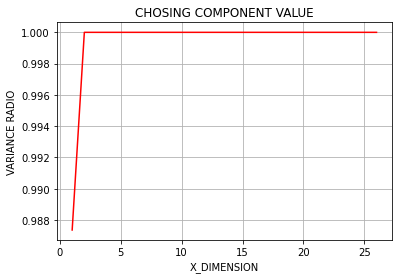

In [35]:
x_dimension = np.arange(1,len(x_train_radio)+1)
plt.title('CHOSING COMPONENT VALUE')
plt.xlabel('X_DIMENSION')
plt.ylabel('VARIANCE RADIO')
plt.grid()
plt.plot(x_dimension,x_train_radio,color='red')
plt.show

_GRAFİĞE BAKILIRSA 3 DIMENSİONDAN SONRA SABİTLENİYOR BU YÜZDEN 'n_component = 3' SEÇEREK FİT EDECEĞİZ_


In [73]:
pca = PCA(n_components=1)
X3_train = pca.fit_transform(train_x)
X3_test = pca.fit_transform(test_x)

print(train_y.shape)
print('*******************')
(X3_train.shape) , X3_test.shape

(29168,)
*******************


((29168, 1), (3241, 1))

*Veri Kaybı:*

In [65]:
1-X3_train.explained_variance_ratio_.sum()

0.01471419879169833

# Linear Regession Modeli

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

The model mean square error is 0.16450621336186166
^^^^^^^^^^^^^^^^**************^^^^^^^^^^^^^^
The model R^2 score is 0.03743419064951581
***********************^^^^^^^^^^^^^^^^^^^**************


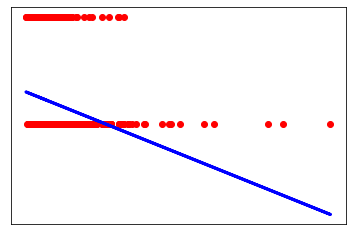

In [76]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X3_train,train_y)
predict_y = LR.predict(X3_test)
#Model Scores
print(f'The model mean square error is {mean_squared_error(test_y,predict_y)}')
print('^^^^^^^^^^^^^^^^**************^^^^^^^^^^^^^^')
print(f'The model R^2 score is {r2_score(test_y,predict_y)}')
print('***********************^^^^^^^^^^^^^^^^^^^**************')

#Model Plot
plt.scatter(X3_test,test_y,color='red')
plt.plot(X3_test,predict_y,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show() 
